In [ ]:
# taken from https://thecleverprogrammer.com/2020/05/26/supermarket-sales-analysis-with-data-science/
# https://towardsdatascience.com/exploratory-data-analysis-using-spermarket-sales-data-in-python-e99d329a07fc

In [ ]:
# importing the libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# displaying the dataset

data=pd.read_csv("Supermarket_Delta_Data.csv")
print(data.shape)

data.describe()

(1000, 17)


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


A    340
B    332
C    328
Name: Branch, dtype: int64

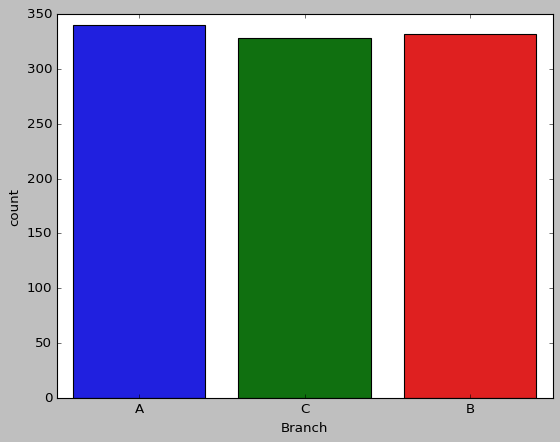

In [ ]:
# visualising the number of sales in branches

sns.countplot(data['Branch'])
data['Branch'].value_counts()

# There is not much difference in sales across the 3 branches of A, B and C. The sales in branch A is a bit higher than the rest of the branches.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


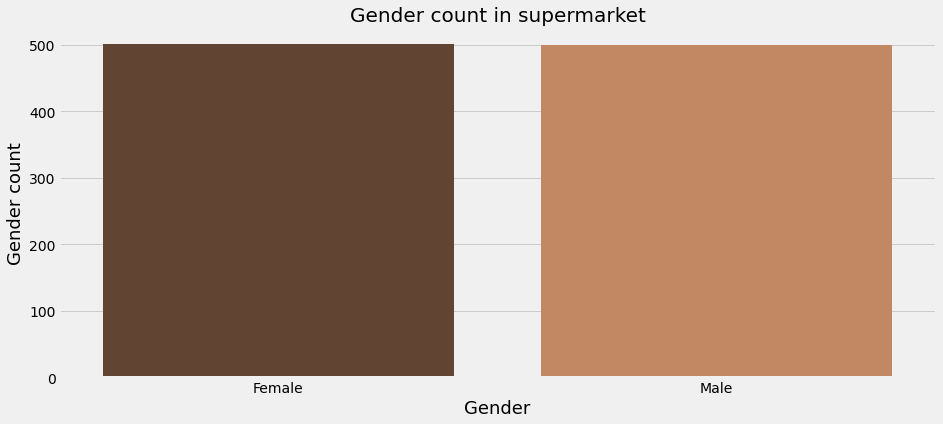

,Total
Gender,
Female,167882.925
Male,155083.824


In [ ]:
# visualising the gender

plt.figure(figsize=(14,6))
plt.style.use('fivethirtyeight')
ax= sns.countplot('Gender', data=data , palette = 'copper')
ax.set_xlabel(xlabel= "Gender",fontsize=18)
ax.set_ylabel(ylabel = "Gender count", fontsize = 18)
ax.set_title(label = "Gender count in supermarket", fontsize = 20)
plt.show()

data.groupby(['Gender']).agg({'Total':'sum'})

Text(0, 0.5, 'Customer Count')

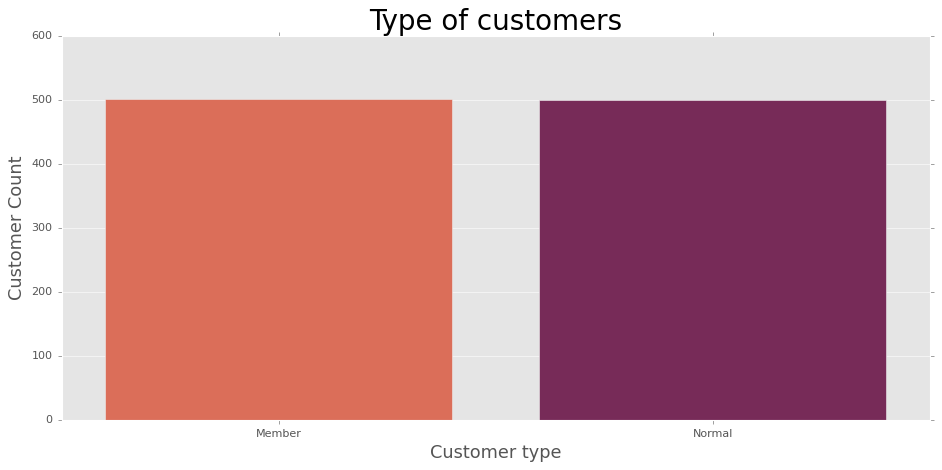

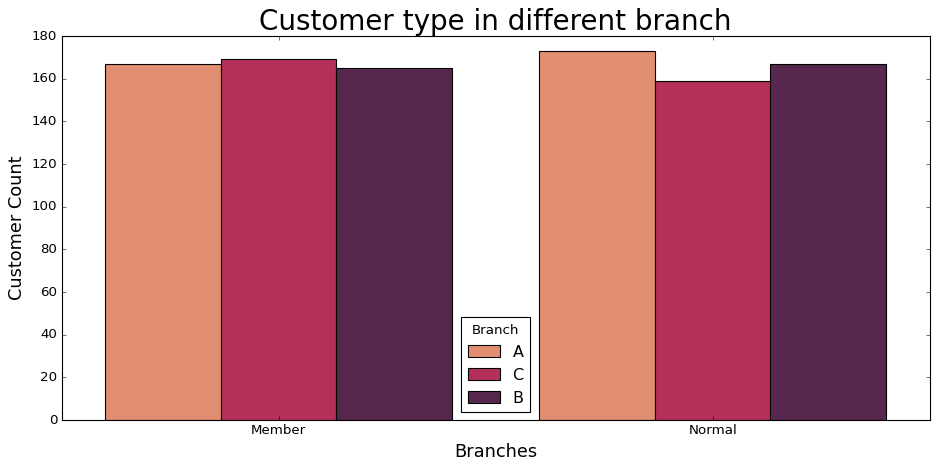

In [ ]:
# visualising customer types

plt.style.use('ggplot')
plt.figure(figsize= (14,6))
ax = sns.countplot(x = "Customer type", data = data, palette = "rocket_r")
ax.set_title("Type of customers", fontsize = 25)
ax.set_xlabel("Customer type", fontsize = 16)
ax.set_ylabel("Customer Count", fontsize = 16)

data.groupby(['Customer type']).agg({'Total': 'sum'}) # this will give the types of customers in all branch COMBINED

# this gives the data of customer types in different branches

plt.figure(figsize=(14,6))
plt.style.use('classic')
ax = sns.countplot(x = "Customer type", hue = "Branch", data = data, palette= "rocket_r")
ax.set_title(label = "Customer type in different branch", fontsize = 25)
ax.set_xlabel(xlabel = "Branches", fontsize = 16)
ax.set_ylabel(ylabel = "Customer Count", fontsize = 16)

Text(0, 0.5, 'Peple Count')

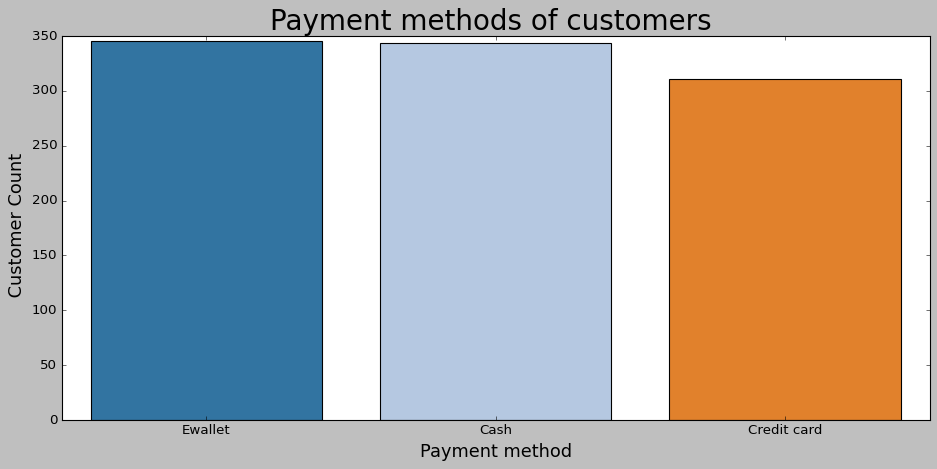

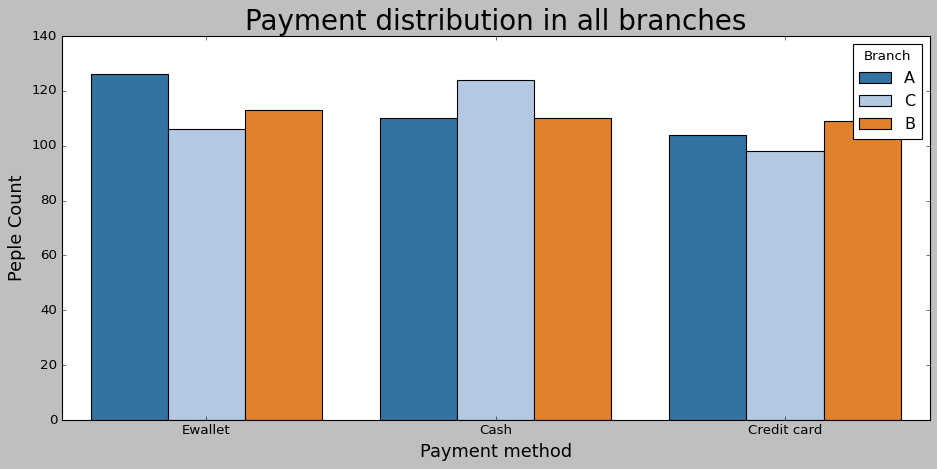

In [ ]:
# visualising different payment methods used

plt.figure(figsize = (14,6))
ax = sns.countplot(x = "Payment", data = data, palette = "tab20")
ax.set_title(label = "Payment methods of customers ", fontsize= 25)
ax.set_xlabel(xlabel = "Payment method", fontsize = 16)
ax.set_ylabel(ylabel = " Customer Count", fontsize = 16)

data.groupby(['Payment']).agg({'Total':'sum'})

# payment method distribution in all branches

plt.figure(figsize = (14,6))
plt.style.use('classic')
ax = sns.countplot(x="Payment", hue = "Branch", data = data, palette= "tab20")
ax.set_title(label = "Payment distribution in all branches", fontsize= 25)
ax.set_xlabel(xlabel = "Payment method", fontsize = 16)
ax.set_ylabel(ylabel = "Peple Count", fontsize = 16)

# The most popular payment method is in-fact E-wallet and not credit cards.Cash payment is also popular.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


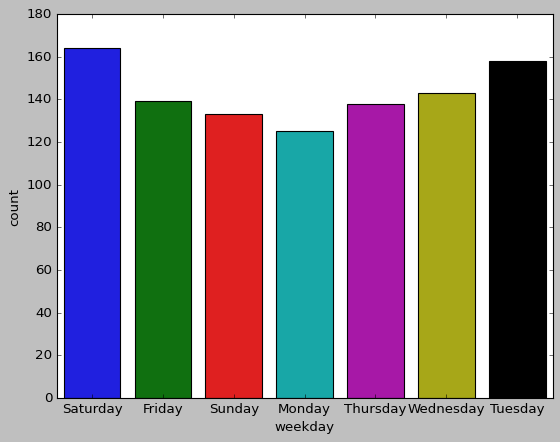

In [ ]:
# visualising which days of the week sales happen
# change the date variable to date

data['Date'] = pd.to_datetime(data['Date'])
data['weekday'] = data['Date'].dt.day_name()

sns.countplot(data['weekday'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


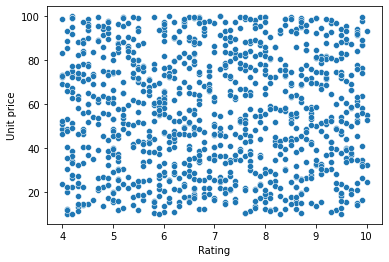

In [ ]:
# is there a corelation between rating and gross income?

# sns.scatterplot(data['Rating'], data['gross income']) # no assc

# is there a relationship between rating and unit price?

sns.scatterplot(data['Rating'], data['Unit price']) # no assc - pretty scattered

# is there a corelation between customer type and gross income?

# sns.scatterplot(data['Customer type'], data['gross income'])


Text(0, 0.5, 'Rating distribution')

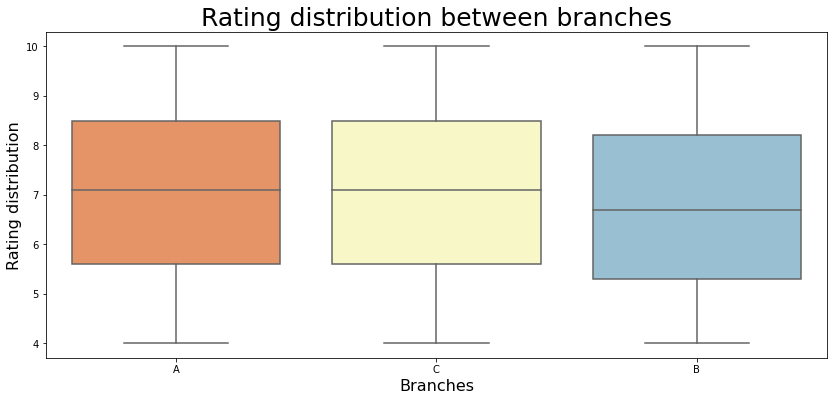

In [ ]:
# visualise rating distribution in 3 branches

plt.figure(figsize=(14,6)) 
ax = sns.boxplot(x="Branch", y = "Rating" ,data =data, palette= "RdYlBu")
ax.set_title("Rating distribution between branches", fontsize = 25)
ax.set_xlabel(xlabel = "Branches", fontsize = 16)
ax.set_ylabel(ylabel = "Rating distribution", fontsize = 16)

'\nThere is not much difference in gross income by branches at an average level. \nBranch C has a slightly higher income than A or B.\nAs observed earlier,though branch A has slightly higher sales than the rest,\nC i.e. Naypyitaw is the most profitable branch in terms of gross income.\n'

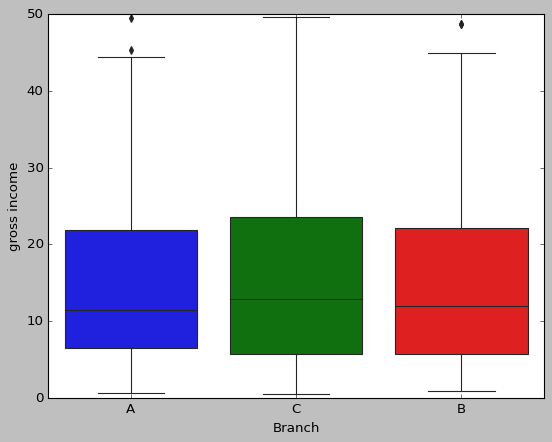

In [ ]:
# which branch is the most profitable?

sns.boxplot(x=data['Branch'], y=data['gross income'])
'''
There is not much difference in gross income by branches at an average level. 
Branch C has a slightly higher income than A or B.
As observed earlier,though branch A has slightly higher sales than the rest,
C i.e. Naypyitaw is the most profitable branch in terms of gross income.
'''


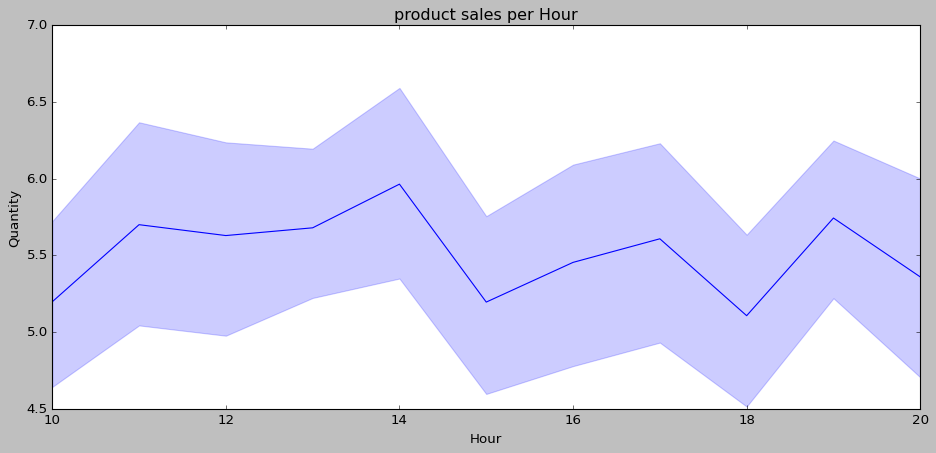

In [ ]:
# visualising max sales time

data["Time"]= pd.to_datetime(data["Time"])
2
data["Hour"]= (data["Time"]).dt.hour
3
plt.figure(figsize=(14,6))
4
plt.style.use('classic')
5
SalesTime = sns.lineplot(x="Hour", y ="Quantity", data = data).set_title("product sales per Hour")

# result: supermarket makes most of its sells in 14:00 hrs local time

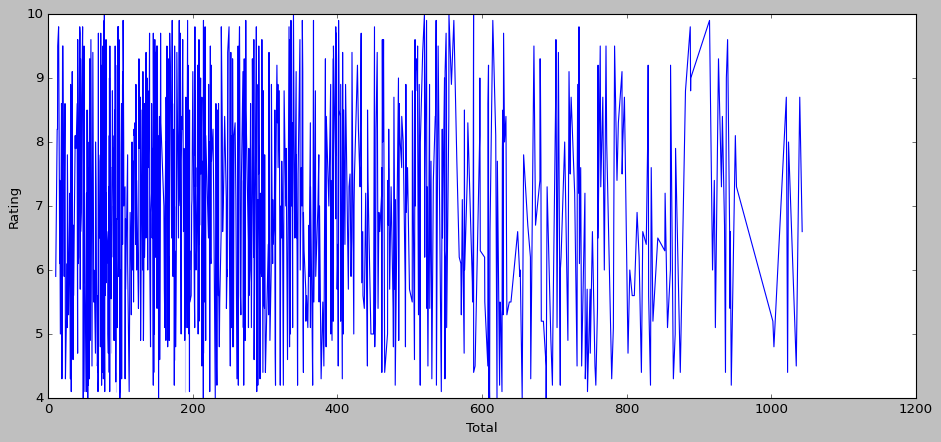

In [ ]:
# visualising rating vs sales

plt.figure(figsize=(14,6))
plt.style.use('classic')
rating_vs_sales = sns.lineplot(x="Total", y= "Rating", data=data)

Text(0, 0.5, 'Product Line')

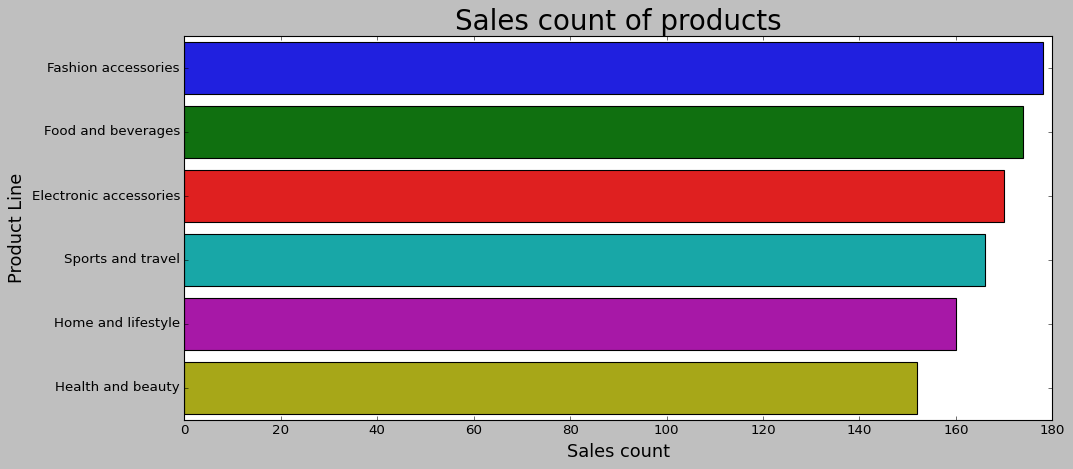

In [ ]:
# visualising average sales of lines of products using bar chart

plt.figure(figsize=(14,6))
ax = sns.countplot(y='Product line', data=data, order = data['Product line'].value_counts().index)
ax.set_title(label = "Sales count of products", fontsize = 25)
ax.set_xlabel(xlabel = "Sales count", fontsize = 16)
ax.set_ylabel(ylabel= "Product Line", fontsize = 16)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


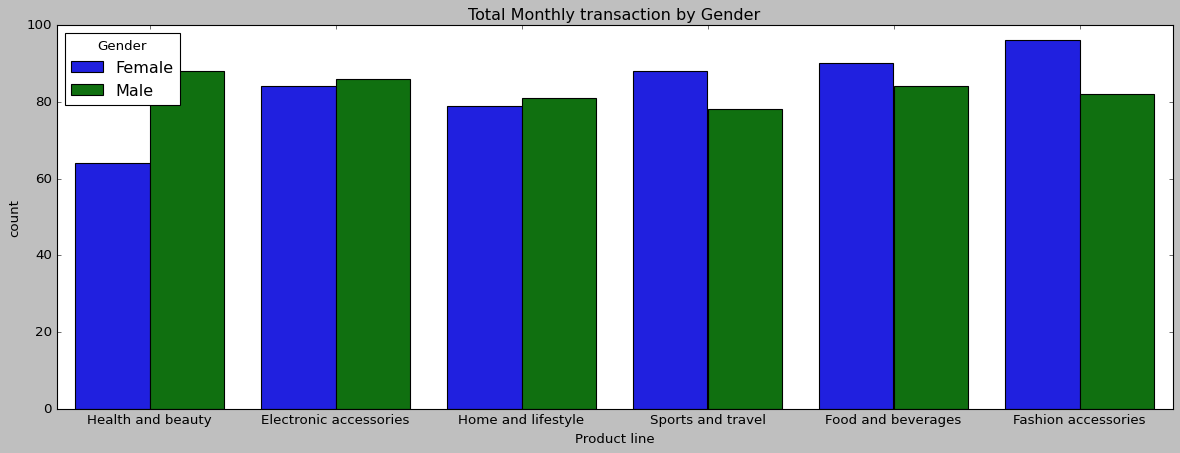

In [ ]:
# spending patterns of males and females, and in which category they spend a lot

plt.figure(figsize=(18, 6))
plt.title('Total Monthly transaction by Gender')
sns.countplot(data['Product line'], hue = data.Gender) 

# Females spend on 'fashion accessories' the most and for males it is 'Health and beauty'. Females also spend more on 'Sports and travel'.

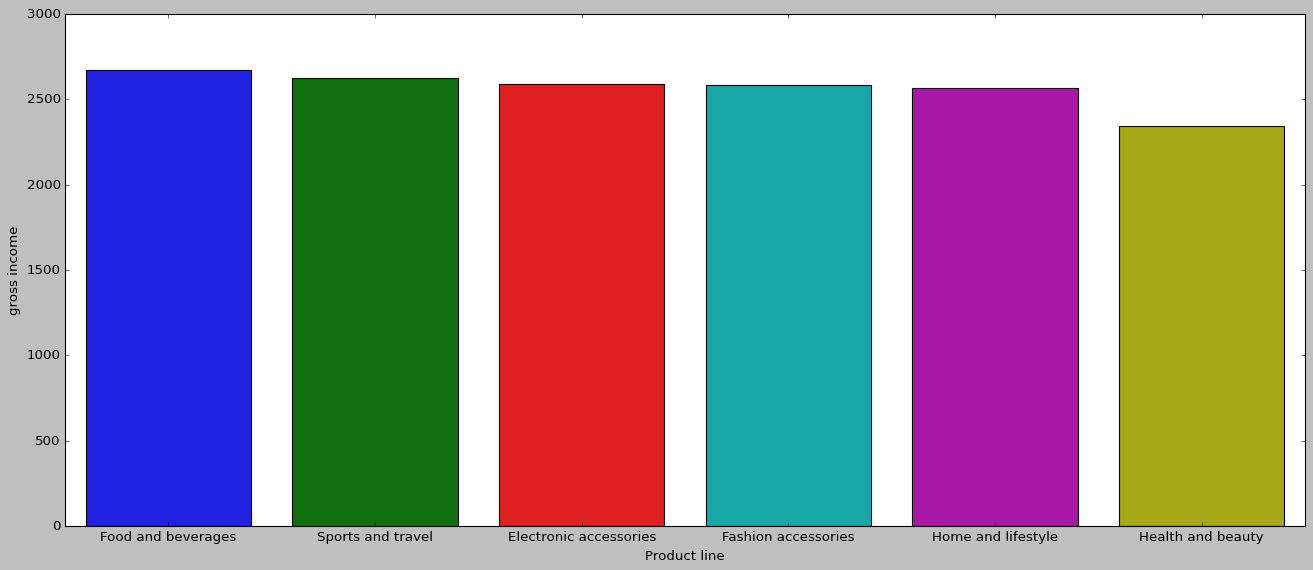

In [ ]:
# which product line generates most income?

cat=data[["Product line", "gross income"]].groupby(['Product line'], as_index=False).sum().sort_values(by='gross income', ascending=False)
plt.figure(figsize=(20,8))
sns.barplot(x='Product line', y='gross income', data=cat)

# food and beverages generates most income

Text(0, 0.5, 'Product line')

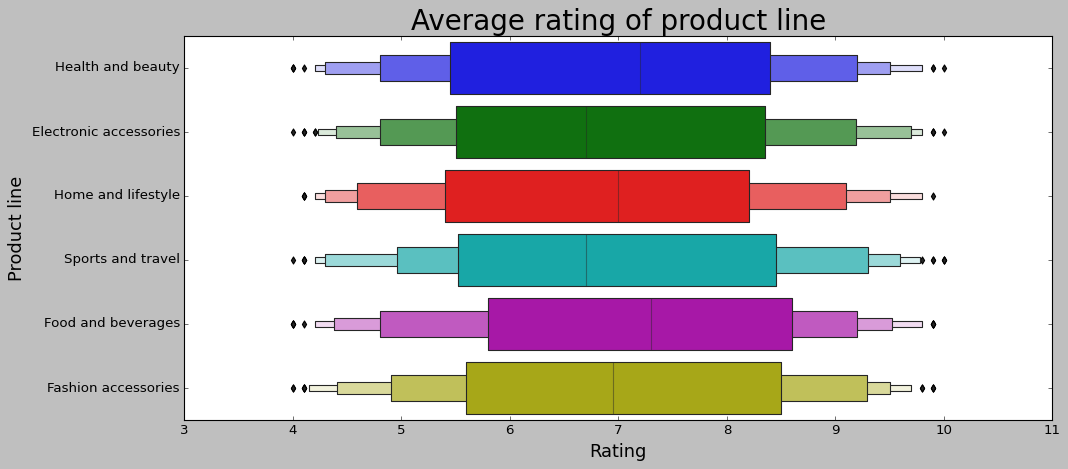

In [ ]:
# average ratings of products

plt.figure(figsize = (14,6))
plt.style.use('classic')
ax = sns.boxenplot(y = "Product line", x = "Rating", data = data)
ax.set_title("Average rating of product line", fontsize = 25)
ax.set_xlabel("Rating", fontsize = 16)
ax.set_ylabel("Product line", fontsize = 16)

Text(0, 0.5, 'Product Line')

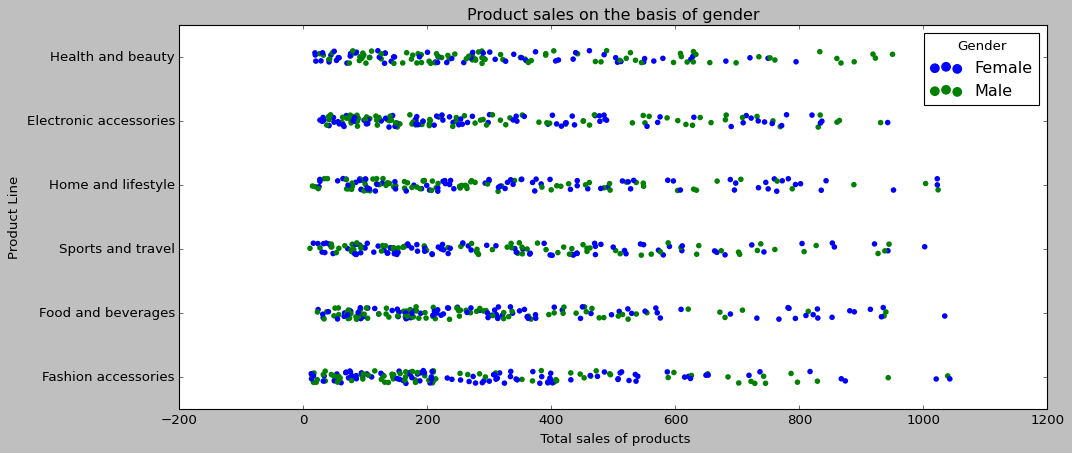

In [ ]:
# pdocut sales on basis of gender

plt.style.use('classic')
plt.figure(figsize = (14,6))
ax= sns.stripplot(y= "Product line", x = "Total", hue = "Gender", data = data)
ax.set_title(label = "Product sales on the basis of gender")
ax.set_xlabel(xlabel = " Total sales of products")
ax.set_ylabel(ylabel = "Product Line")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


([<matplotlib.axis.XTick at 0x7fc22dc50ed0>,
 <a list of 10 Text major ticklabel objects>)

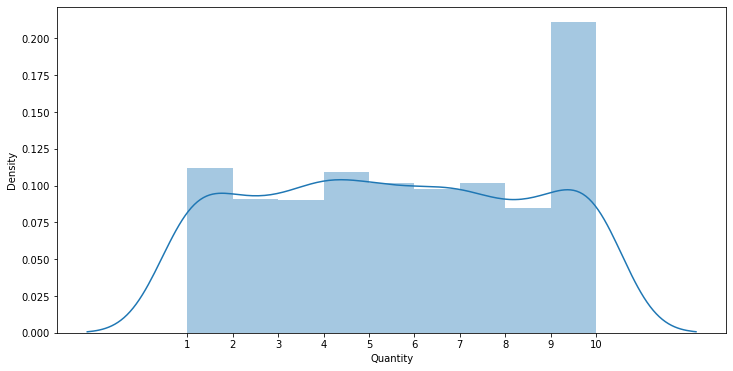

In [ ]:
# number of products most customers buy - using distribution plot

xdata = [1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize = (12,6))
sns.distplot(data['Quantity'])
plt.xticks(xdata) # most customers buy 10 quantities
